We use the dataset of candidates who contested the 2019 Lok Sabha Elections to examine what attributes make a candidate successful in this election

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Loading the dataset to python environment
data=pd.read_csv('LS_2.0.csv')
data


,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258,Maharashtra,YAVATMAL-WASHIM,Anil Jayram Rathod,0,IND,SHIP,MALE,0,43.0,GENERAL,Post Graduate,"Rs 48,90,000\n ~ 48 Lacs+","Rs 10,20,000\n ~ 10 Lacs+",14661,25,14686,0.766419,1.250060,1916185
2259,Telangana,ZAHIRABAD,B.B.PATIL,1,TRS,Car,MALE,18,63.0,GENERAL,Graduate,"Rs 1,28,78,51,556\n ~ 128 Crore+","Rs 1,15,35,000\n ~ 1 Crore+",434066,178,434244,28.975369,41.574183,1498666
2260,Telangana,ZAHIRABAD,MADAN MOHAN RAO,0,INC,Hand,MALE,0,49.0,GENERAL,Post Graduate,"Rs 90,36,63,001\n ~ 90 Crore+",Rs 0\n ~,427900,115,428015,28.559732,40.977823,1498666
2261,Telangana,ZAHIRABAD,BANALA LAXMA REDDY,0,BJP,Lotus,MALE,3,47.0,GENERAL,12th Pass,"Rs 5,85,77,327\n ~ 5 Crore+","Rs 52,50,000\n ~ 52 Lacs+",138731,216,138947,9.271379,13.302678,1498666


In [3]:
data.rename(columns = {'TOTAL\nVOTES':'TOTAL VOTES','CRIMINAL\nCASES':'CRIMINAL CASES','GENERAL\nVOTES':'GENERAL VOTES','POSTAL\nVOTES':'POSTAL VOTES','OVER TOTAL ELECTORS \nIN CONSTITUENCY':'OVER TOTAL ELECTORS IN CONSTITUENCY','OVER TOTAL VOTES POLLED \nIN CONSTITUENCY':'OVER TOTAL VOTES POLLED IN CONSTITUENCY'}, inplace = True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   STATE                                    2263 non-null   object 
 1   CONSTITUENCY                             2263 non-null   object 
 2   NAME                                     2263 non-null   object 
 3   WINNER                                   2263 non-null   int64  
 4   PARTY                                    2263 non-null   object 
 5   SYMBOL                                   2018 non-null   object 
 6   GENDER                                   2018 non-null   object 
 7   CRIMINAL CASES                           2018 non-null   object 
 8   AGE                                      2018 non-null   float64
 9   CATEGORY                                 2018 non-null   object 
 10  EDUCATION                                2018 no

In [5]:
data.isna().sum()

STATE                                        0
CONSTITUENCY                                 0
NAME                                         0
WINNER                                       0
PARTY                                        0
SYMBOL                                     245
GENDER                                     245
CRIMINAL CASES                             245
AGE                                        245
CATEGORY                                   245
EDUCATION                                  245
ASSETS                                     245
LIABILITIES                                245
GENERAL VOTES                                0
POSTAL VOTES                                 0
TOTAL VOTES                                  0
OVER TOTAL ELECTORS IN CONSTITUENCY          0
OVER TOTAL VOTES POLLED IN CONSTITUENCY      0
TOTAL ELECTORS                               0
dtype: int64

In [6]:
data.describe()

,WINNER,AGE,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
count,2263.000000,2018.000000,2.263000e+03,2263.000000,2.263000e+03,2263.000000,2263.000000,2.263000e+03
mean,0.238179,52.273538,2.615991e+05,990.710561,2.625898e+05,15.811412,23.190525,1.658016e+06
std,0.426064,11.869373,2.549906e+05,1602.839174,2.559822e+05,14.962861,21.564758,3.145187e+05
min,0.000000,25.000000,1.339000e+03,0.000000,1.342000e+03,0.097941,1.000039,5.518900e+04
25%,0.000000,43.250000,2.103450e+04,57.000000,2.116250e+04,1.296518,1.899502,1.530014e+06
50%,0.000000,52.000000,1.539340e+05,316.000000,1.544890e+05,10.510553,16.221721,1.679030e+06
75%,0.000000,61.000000,4.858040e+05,1385.000000,4.872315e+05,29.468185,42.590233,1.816857e+06
max,1.000000,86.000000,1.066824e+06,19367.000000,1.068569e+06,51.951012,74.411856,3.150313e+06


In [7]:
data.describe(include='O')

,STATE,CONSTITUENCY,NAME,PARTY,SYMBOL,GENDER,CRIMINAL CASES,CATEGORY,EDUCATION,ASSETS,LIABILITIES
count,2263,2263,2263,2263,2018,2018,2018,2018,2018,2018,2018
unique,36,539,2014,133,126,2,29,3,13,1979,1226
top,Uttar Pradesh,AURANGABAD,NOTA,BJP,Lotus,MALE,0,GENERAL,Post Graduate,Not Available,Rs 0\n ~
freq,274,14,245,420,420,1760,1242,1392,502,22,634


In [8]:
data.columns

Index(['STATE', 'CONSTITUENCY', 'NAME', 'WINNER', 'PARTY', 'SYMBOL', 'GENDER',
       'CRIMINAL CASES', 'AGE', 'CATEGORY', 'EDUCATION', 'ASSETS',
       'LIABILITIES', 'GENERAL VOTES', 'POSTAL VOTES', 'TOTAL VOTES',
       'OVER TOTAL ELECTORS IN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED IN CONSTITUENCY', 'TOTAL ELECTORS'],
      dtype='object')

# EXPLORATORY DATA ANALYSIS

# UNIVARIATE

# AGE DISTRIBUTION OF CANDIDATES

<AxesSubplot:xlabel='AGE', ylabel='Count'>

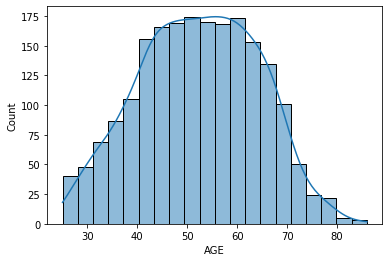

In [9]:
sns.histplot(data=data,x='AGE',kde=True,bins=20)

The above age distribution shows us that the majority of candidate age between 40 to 64.

# Gender  Wise distribution

In [10]:
data['GENDER'].value_counts()

MALE      1760
FEMALE     258
Name: GENDER, dtype: int64

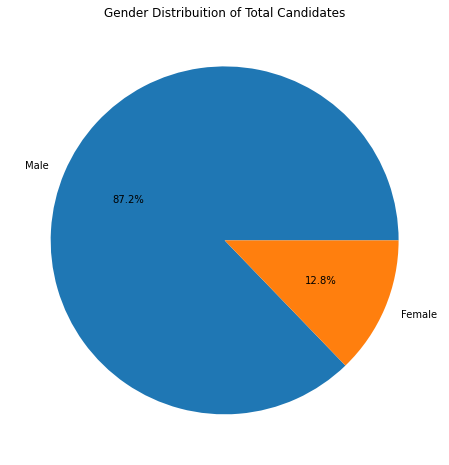

In [11]:
plt.figure(figsize=(16,8))
plt.pie(data['GENDER'].value_counts(),labels =['Male','Female'],autopct='%1.1f%%')
plt.title('Gender Distribuition of Total Candidates')
plt.show()

# CANDIDATE COUNT FROM EACH PARTY

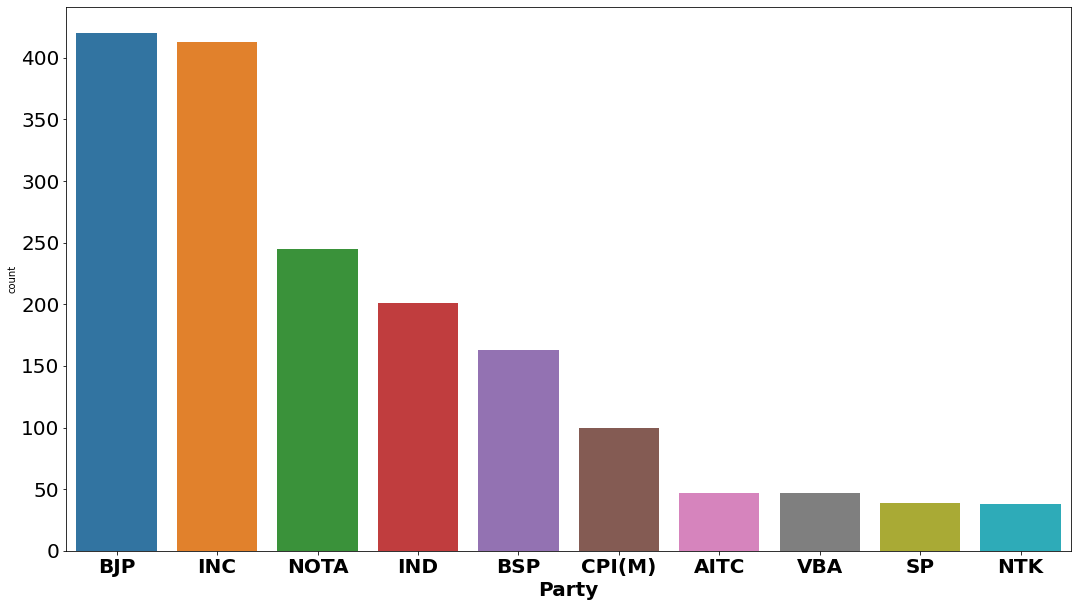

In [12]:
plt.figure(figsize=(18,10))
sns.countplot(x='PARTY',data=data,order=data.PARTY.value_counts().iloc[:10].index)

plt.xticks(fontsize=20,fontweight=1000)
plt.yticks(fontsize=20)
plt.xlabel('Party',fontsize=20,fontweight = 'bold')

plt.show()

BJP and INC has more number of candidates

# EDUCATIONAL BACKGROUND

In [13]:
data.EDUCATION.value_counts()

Post Graduate            502
Graduate                 441
Graduate Professional    336
12th Pass                256
10th Pass                196
8th Pass                  78
Doctorate                 73
Others                    50
Literate                  30
5th Pass                  28
Not Available             22
Illiterate                 5
Post Graduate\n            1
Name: EDUCATION, dtype: int64

In [14]:
data['EDUCATION'] = data['EDUCATION'].replace(['Post Graduate\n'],'Post Graduate')
data['EDUCATION'].value_counts()


Post Graduate            503
Graduate                 441
Graduate Professional    336
12th Pass                256
10th Pass                196
8th Pass                  78
Doctorate                 73
Others                    50
Literate                  30
5th Pass                  28
Not Available             22
Illiterate                 5
Name: EDUCATION, dtype: int64

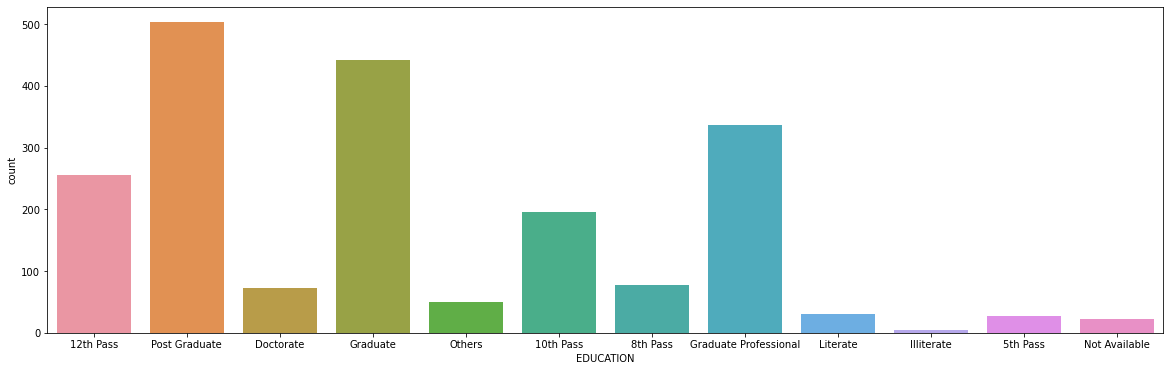

In [15]:
plt.figure(figsize=(20,6))
sns.countplot(x='EDUCATION',data=data);

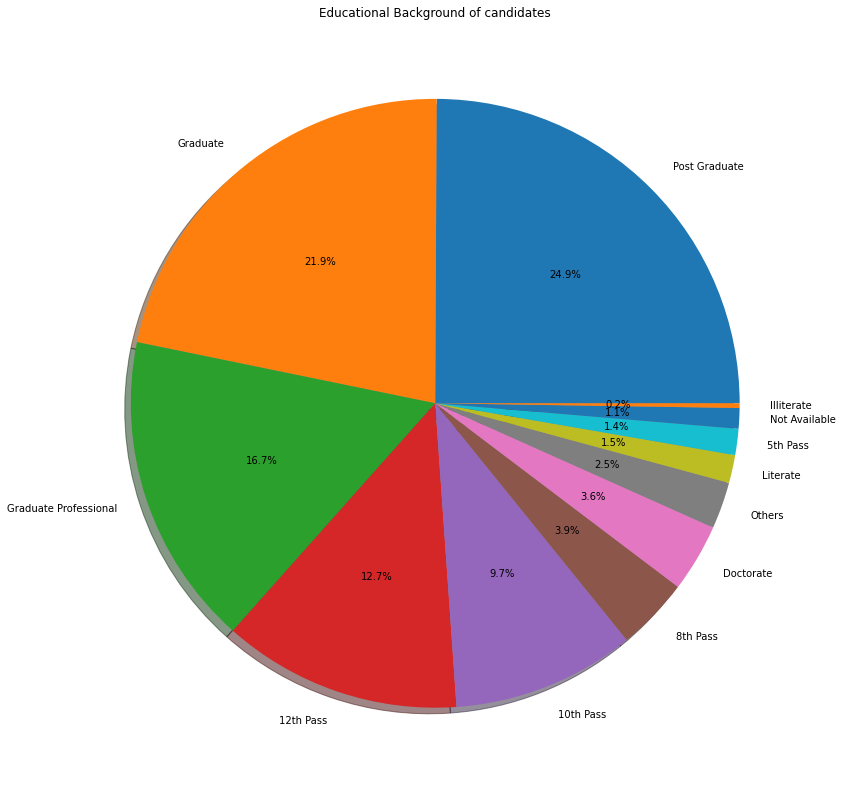

In [16]:
labels=list(dict(data['EDUCATION'].value_counts()))
d1=list(data['EDUCATION'].value_counts())
plt.figure(figsize=(16,14))
plt.pie(d1,labels = labels,shadow=True,autopct='%1.1f%%')
plt.title('Educational Background of candidates')
plt.show()


# CRIMINAL BACKGROUND

In [17]:
data['CRIMINAL CASES'].value_counts()

0                1242
1                 313
2                 119
3                 104
4                  64
5                  42
6                  26
Not Available      22
7                  18
8                  16
10                 11
9                  11
11                  5
14                  4
12                  4
13                  3
15                  2
22                  1
240                 1
41                  1
16                  1
204                 1
18                  1
28                  1
24                  1
52                  1
40                  1
42                  1
31                  1
Name: CRIMINAL CASES, dtype: int64

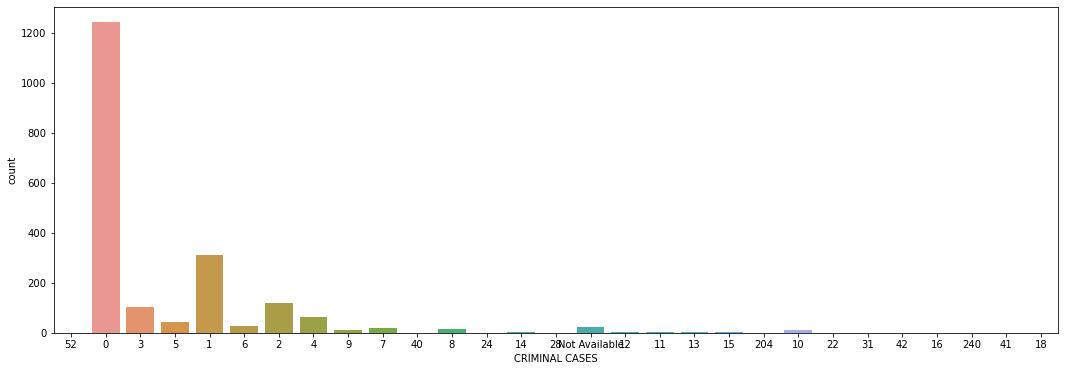

In [18]:
plt.figure(figsize=(18,6))
sns.countplot(x='CRIMINAL CASES',data=data);

# WINNERS

In [19]:
data['WINNER'].value_counts()

0    1724
1     539
Name: WINNER, dtype: int64

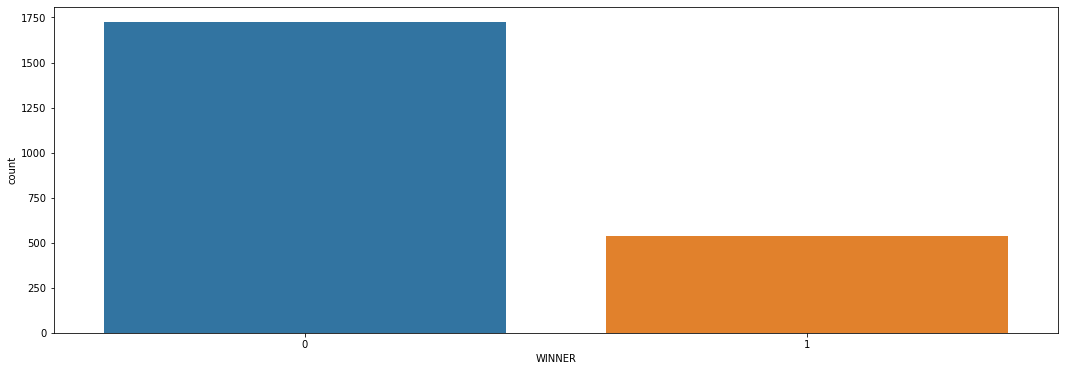

In [20]:
plt.figure(figsize=(18,6))
sns.countplot(x='WINNER',data=data);

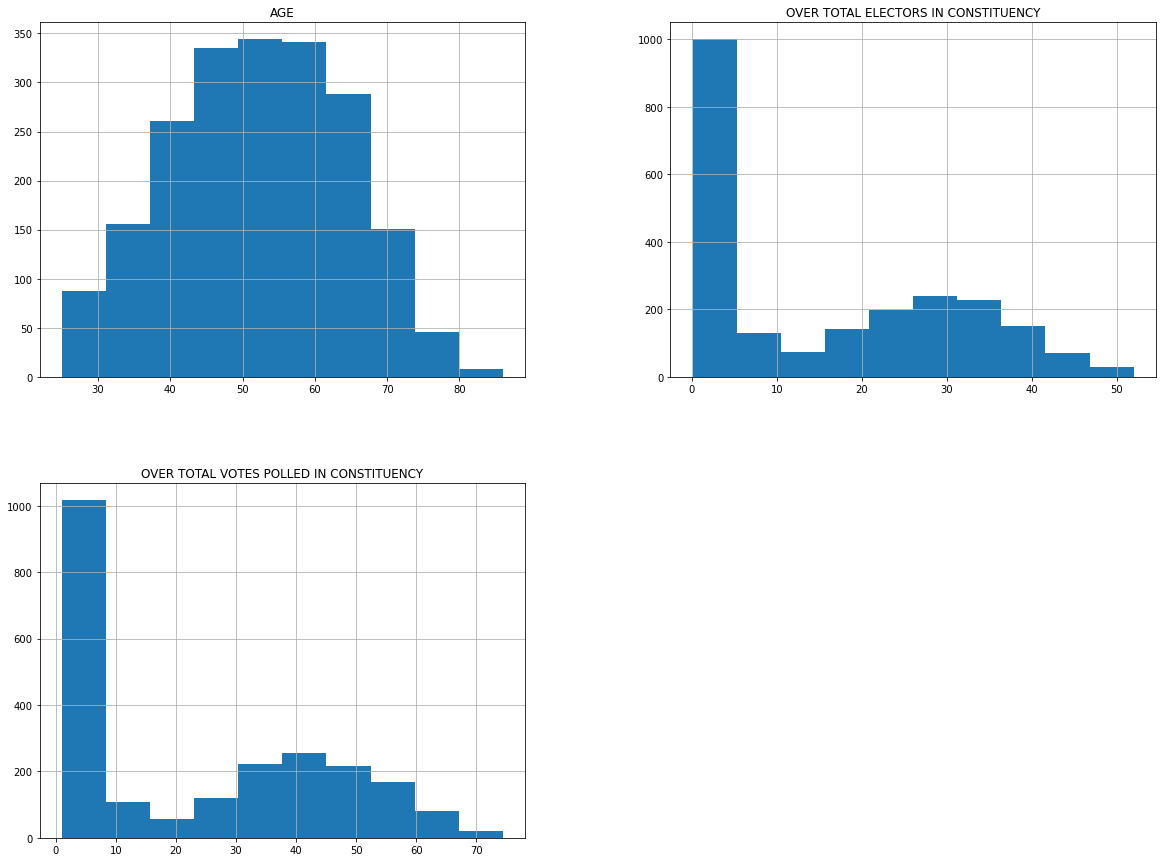

In [21]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [22]:
data['CATEGORY'].value_counts()

GENERAL    1392
SC          383
ST          243
Name: CATEGORY, dtype: int64

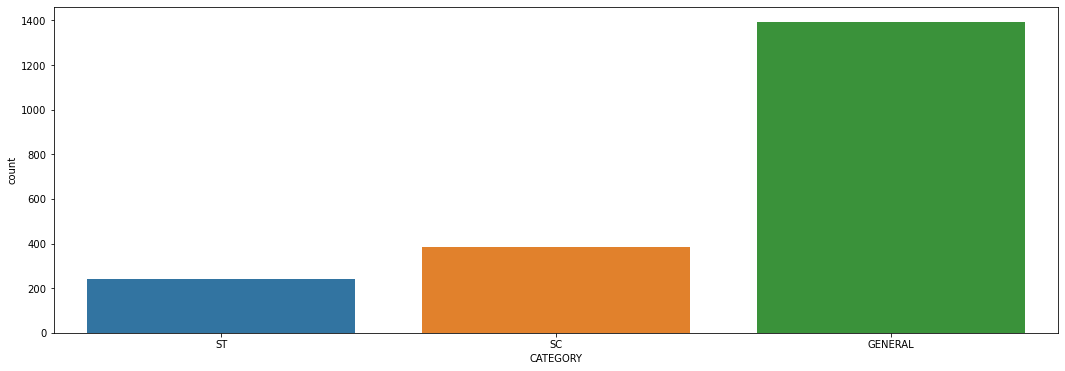

In [23]:
plt.figure(figsize=(18,6))
sns.countplot(x='CATEGORY',data=data);

# BIVARIATE

In [24]:
data.groupby("GENDER")["WINNER"].value_counts()


GENDER  WINNER
FEMALE  0          182
        1           76
MALE    0         1297
        1          463
Name: WINNER, dtype: int64

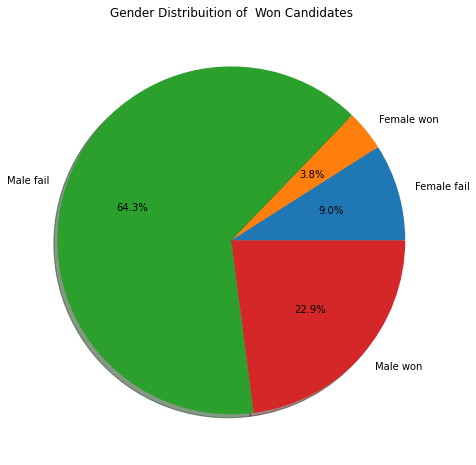

In [25]:
label=['Female fail','Female won','Male fail','Male won']
plt.figure(figsize=(16,8))
plt.pie(data.groupby("GENDER")["WINNER"].value_counts(),labels=label,shadow=True,autopct='%1.1f%%')
plt.title('Gender Distribuition of  Won Candidates')
plt.show()

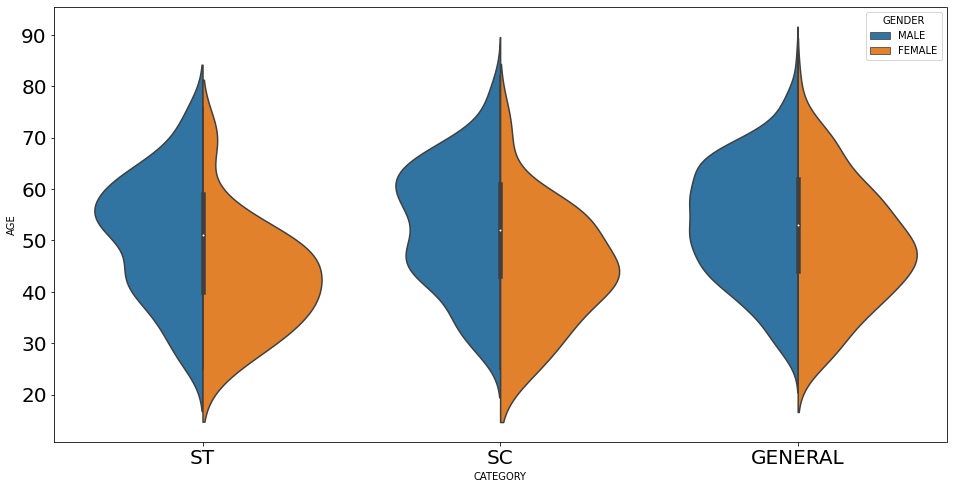

In [26]:
plt.figure(figsize=(16,8))
sns.violinplot(x='CATEGORY',y='AGE',data=data,hue='GENDER',split=True)
plt.xticks(fontsize=20,fontweight=200)
plt.yticks(fontsize=20)
plt.show()

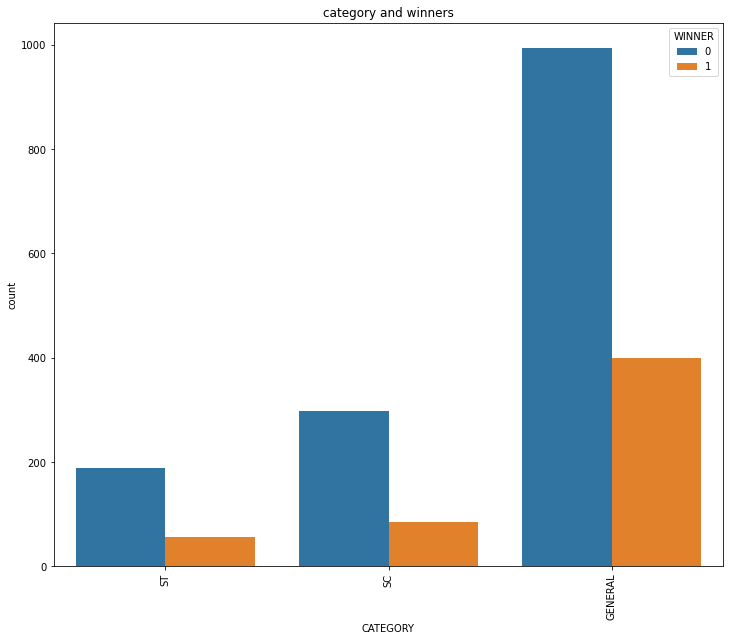

In [27]:
plt.figure(figsize=(12,10))
fig=sns.countplot(x='CATEGORY',hue='WINNER',data=data)
plt.title('category and winners')
plt.xticks(rotation=90)

plt.show()

# YOUNGEST WINNER

In [28]:
young = data[data['WINNER']==1]
young= young.sort_values('AGE').head(10)

Text(0.5, 1.0, 'The Youngest Winners')

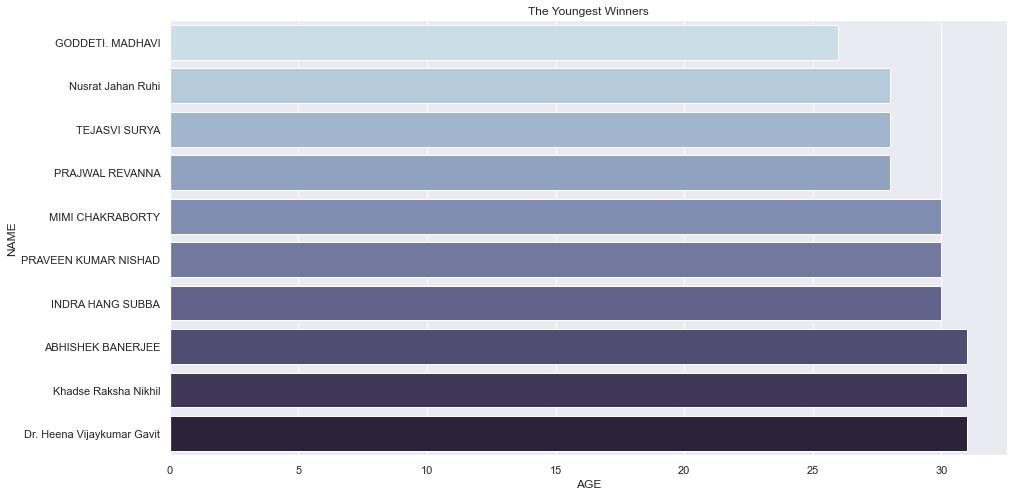

In [29]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
L7=list(young["NAME"])
L8=list(young["AGE"])
sns.barplot(data=young,x=L8,y=L7,palette="ch:s=.25,rot=-.25")
plt.xlabel("AGE")
plt.ylabel("NAME")
plt.title("The Youngest Winners")

# OLDEST WINNER

In [30]:
old= data[data['WINNER']==1]
old = old.sort_values('AGE',ascending = False).head(10)

Text(0.5, 1.0, 'Seniocitizen Winners')

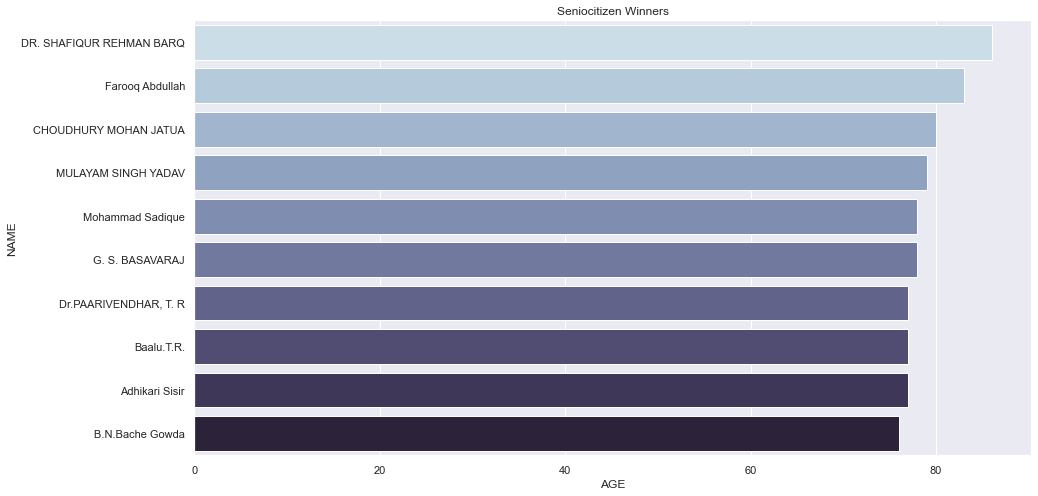

In [31]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
L9=list(old["NAME"])
L0=list(old["AGE"])
sns.barplot(data=old,x=L0,y=L9,palette="ch:s=.25,rot=-.25")
plt.xlabel("AGE")
plt.ylabel("NAME")
plt.title("Seniocitizen Winners")

In [32]:
Female_winner= data[(data['WINNER']==1) & (data['GENDER']=='FEMALE')]

Text(0.5, 1.0, 'Female Winners from different States')

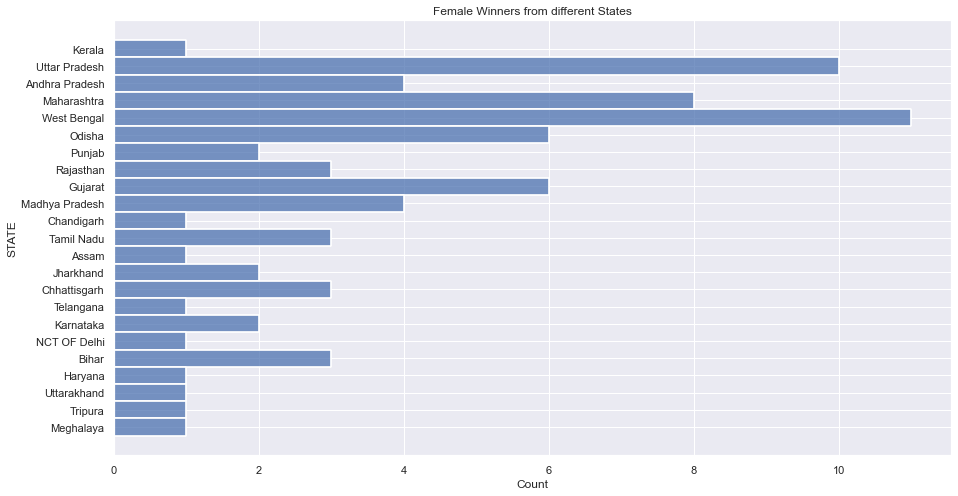

In [33]:
plt.figure(figsize=(15,8))
sns.histplot(data=Female_winner,y="STATE",palette="ch:s=.25,rot=-.25")
plt.title("Female Winners from different States")

Highest number of Female winners were from West Bengal

In [34]:
male_winners = data[(data['WINNER']==1) & (data['GENDER']=='MALE')]

Text(0.5, 1.0, 'Male Winners from different States')

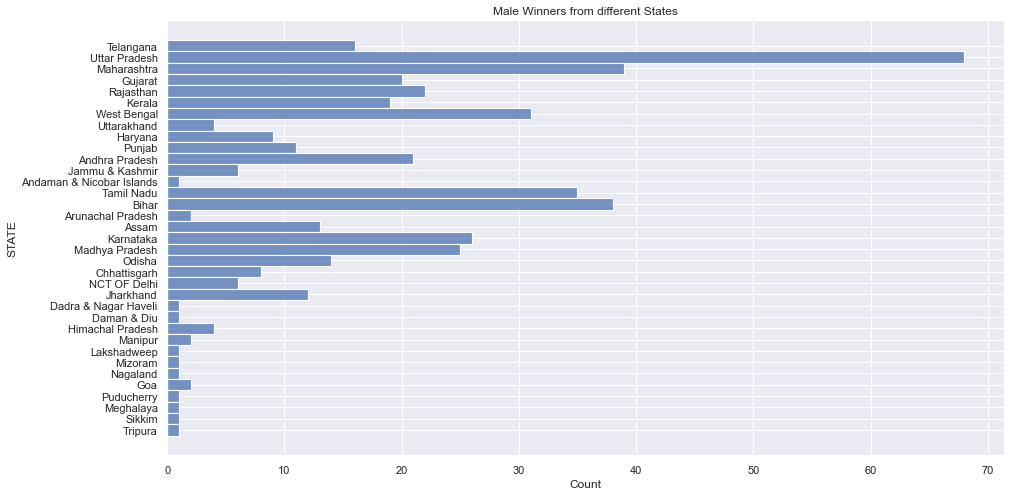

In [35]:
plt.figure(figsize=(15,8))
sns.histplot(data=male_winners,y="STATE",palette="ch:s=.25,rot=-.25")
plt.title("Male Winners from different States")

# PREPROCESSING

Checking for null values

In [36]:
data.isna().sum()

STATE                                        0
CONSTITUENCY                                 0
NAME                                         0
WINNER                                       0
PARTY                                        0
SYMBOL                                     245
GENDER                                     245
CRIMINAL CASES                             245
AGE                                        245
CATEGORY                                   245
EDUCATION                                  245
ASSETS                                     245
LIABILITIES                                245
GENERAL VOTES                                0
POSTAL VOTES                                 0
TOTAL VOTES                                  0
OVER TOTAL ELECTORS IN CONSTITUENCY          0
OVER TOTAL VOTES POLLED IN CONSTITUENCY      0
TOTAL ELECTORS                               0
dtype: int64

In [37]:
missing_val_percentage=data.isna().sum()[data.isna().sum()>0]*100/data.shape[0]
print("Percentage of Missing\n")
print(missing_val_percentage)

Percentage of Missing

SYMBOL            10.826337
GENDER            10.826337
CRIMINAL CASES    10.826337
AGE               10.826337
CATEGORY          10.826337
EDUCATION         10.826337
ASSETS            10.826337
LIABILITIES       10.826337
dtype: float64


In [38]:
data.EDUCATION.unique()

array(['12th Pass', 'Post Graduate', nan, 'Doctorate', 'Graduate',
       'Others', '10th Pass', '8th Pass', 'Graduate Professional',
       'Literate', 'Illiterate', '5th Pass', 'Not Available'],
      dtype=object)

In [39]:
def update_education(row):
    if row['EDUCATION'] in ['Illiterate','Not Available']:
        return 'Iliterate/NA'
    if row['EDUCATION'] in ['5th Pass','8th Pass','10th Pass','12th Pass']:
        return 'School Level'
    elif row['EDUCATION'] in ['Graduate Professional','Graduate']: 
        return 'Graduate'
    elif row['EDUCATION'] in ['Post Graduate\n','Post Graduate', 'Doctorate']:
        return 'Post Graduate/Doctorate'
    else:
        'Literate'
        
data['EDUCATION'] = data.apply(update_education,axis =1)

In [40]:
def update_age(row):
    if row['AGE']<35 :
        return 'YOUTH'
    elif row['AGE']<60:
        return'MIDLE AGE'
    elif row['AGE']>60:
        return 'SENIOR'
    else:
        'non'
     
        
data['AGE GROUP'] = data.apply(update_age,axis =1)

In [41]:
data['EDUCATION'].fillna('Iliterate/NA', inplace=True)

In [42]:
data.isna().sum()

STATE                                        0
CONSTITUENCY                                 0
NAME                                         0
WINNER                                       0
PARTY                                        0
SYMBOL                                     245
GENDER                                     245
CRIMINAL CASES                             245
AGE                                        245
CATEGORY                                   245
EDUCATION                                    0
ASSETS                                     245
LIABILITIES                                245
GENERAL VOTES                                0
POSTAL VOTES                                 0
TOTAL VOTES                                  0
OVER TOTAL ELECTORS IN CONSTITUENCY          0
OVER TOTAL VOTES POLLED IN CONSTITUENCY      0
TOTAL ELECTORS                               0
AGE GROUP                                  297
dtype: int64

In [43]:
data['AGE']=data['AGE'].fillna(data['AGE'].median())

In [44]:
data.isna().sum()

STATE                                        0
CONSTITUENCY                                 0
NAME                                         0
WINNER                                       0
PARTY                                        0
SYMBOL                                     245
GENDER                                     245
CRIMINAL CASES                             245
AGE                                          0
CATEGORY                                   245
EDUCATION                                    0
ASSETS                                     245
LIABILITIES                                245
GENERAL VOTES                                0
POSTAL VOTES                                 0
TOTAL VOTES                                  0
OVER TOTAL ELECTORS IN CONSTITUENCY          0
OVER TOTAL VOTES POLLED IN CONSTITUENCY      0
TOTAL ELECTORS                               0
AGE GROUP                                  297
dtype: int64

In [45]:
data1=data.dropna()

In [47]:
data1.isna().sum()

STATE                                      0
CONSTITUENCY                               0
NAME                                       0
WINNER                                     0
PARTY                                      0
SYMBOL                                     0
GENDER                                     0
CRIMINAL CASES                             0
AGE                                        0
CATEGORY                                   0
EDUCATION                                  0
ASSETS                                     0
LIABILITIES                                0
GENERAL VOTES                              0
POSTAL VOTES                               0
TOTAL VOTES                                0
OVER TOTAL ELECTORS IN CONSTITUENCY        0
OVER TOTAL VOTES POLLED IN CONSTITUENCY    0
TOTAL ELECTORS                             0
AGE GROUP                                  0
dtype: int64

# OUTLIERS

In [48]:
numcols = data1.dtypes[(data1.dtypes=='int64') | (data1.dtypes=='float64')].index

In [1]:
import warnings
warnings.filterwarnings('ignore')

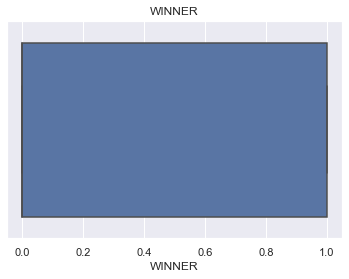

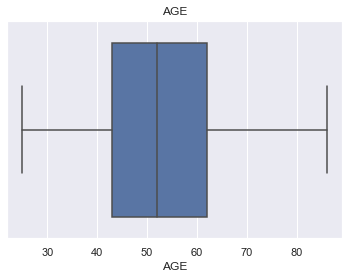

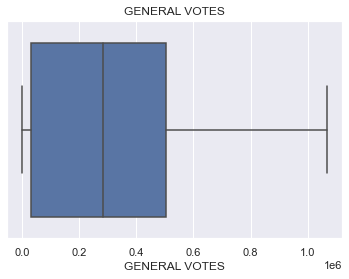

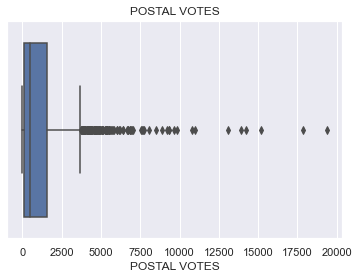

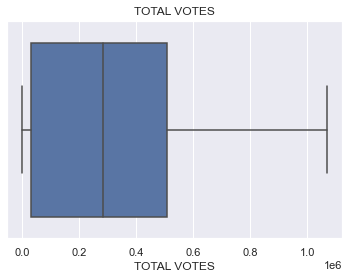

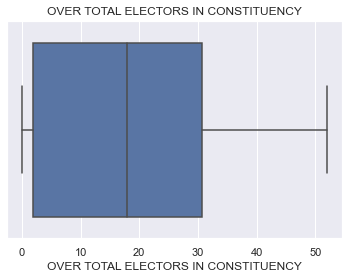

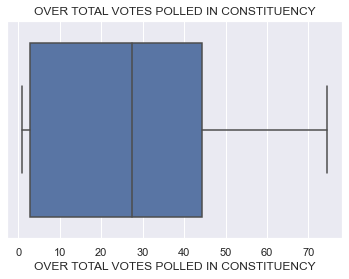

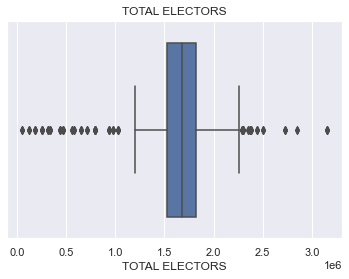

In [50]:
for x in numcols:
    sns.boxplot(data1[x],orient='h')
    plt.title(x)
    plt.show()

In [51]:
for x in numcols:
    print(x)
    descr = data1[x].describe()
    IQR = descr['75%'] - descr['25%']
    upper_limit =  descr['75%'] + 1.5 * IQR
    lower_limit =  descr['25%'] - 1.5 * IQR  
    #outlier replacement
    data1[x][data1[x]>upper_limit] = upper_limit
    data1[x][data1[x]<lower_limit] = lower_limit

WINNER
AGE
GENERAL VOTES
POSTAL VOTES
TOTAL VOTES
OVER TOTAL ELECTORS IN CONSTITUENCY
OVER TOTAL VOTES POLLED IN CONSTITUENCY
TOTAL ELECTORS


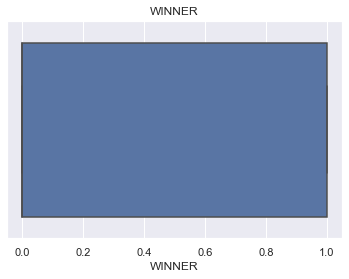

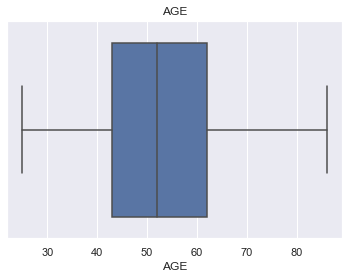

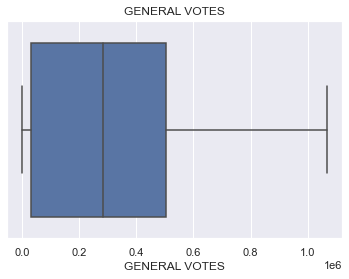

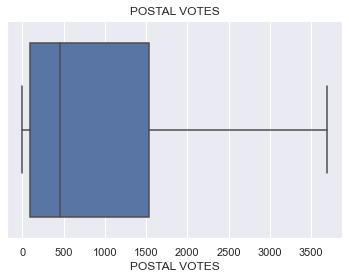

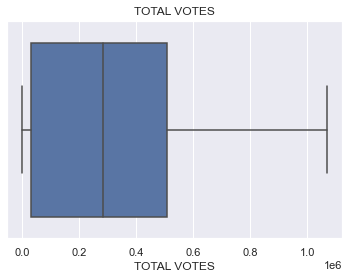

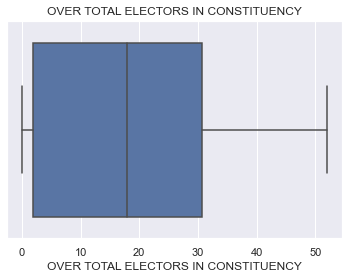

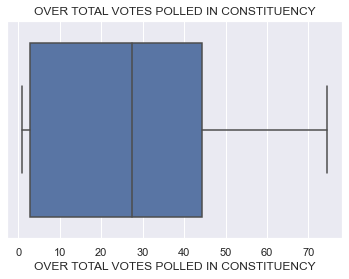

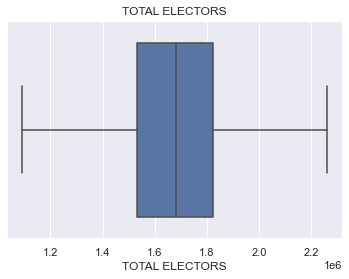

In [52]:
for x in numcols:
    sns.boxplot(data1[x],orient='h')
    plt.title(x)
    plt.show()

In [53]:
data1['CRIMINAL CASES'] = data1['CRIMINAL CASES'].replace({'Not Available': 0})
data1['CRIMINAL CASES'] = data1['CRIMINAL CASES'].fillna(0)

In [54]:
data1['ASSETS'] = data1['ASSETS'].replace(['Nil', '`', 'Not Available'], '0')
data1['LIABILITIES'] = data1['LIABILITIES'].replace(['NIL', '`', 'Not Available'], '0')

In [55]:
data1.dtypes

STATE                                       object
CONSTITUENCY                                object
NAME                                        object
WINNER                                       int64
PARTY                                       object
SYMBOL                                      object
GENDER                                      object
CRIMINAL CASES                              object
AGE                                        float64
CATEGORY                                    object
EDUCATION                                   object
ASSETS                                      object
LIABILITIES                                 object
GENERAL VOTES                                int64
POSTAL VOTES                               float64
TOTAL VOTES                                  int64
OVER TOTAL ELECTORS IN CONSTITUENCY        float64
OVER TOTAL VOTES POLLED IN CONSTITUENCY    float64
TOTAL ELECTORS                             float64
AGE GROUP                      

# Label encoder

In [56]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [57]:
data1['STATE']  = le.fit_transform(data1['STATE'])
data1['CONSTITUENCY']  = le.fit_transform(data1['CONSTITUENCY'])
data1['NAME']  = le.fit_transform(data1['NAME'])
data1['PARTY']  = le.fit_transform(data1['PARTY'])
data1['SYMBOL']  = le.fit_transform(data1['SYMBOL'])
data1['GENDER']  = le.fit_transform(data1['GENDER'])
data1['CATEGORY']  = le.fit_transform(data1['CATEGORY'])
data1['EDUCATION']  = le.fit_transform(data1['EDUCATION'])
data1['ASSETS']  = le.fit_transform(data1['ASSETS'])
data1['AGE GROUP']  = le.fit_transform(data1['AGE GROUP'])
data1.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS,AGE GROUP
0,31,0,1666,1,26,80,1,52,52.0,2,3,1054,"Rs 2,31,450\n ~ 2 Lacs+",376892,482.0,377374,25.330684,35.468248,1489790.0,0
1,31,0,675,0,118,32,1,0,54.0,2,2,292,"Rs 8,47,000\n ~ 8 Lacs+",318665,149.0,318814,21.399929,29.964370,1489790.0,0
2,31,0,1454,0,45,66,1,3,52.0,2,3,1014,"Rs 1,53,00,000\n ~ 1 Crore+",314057,181.0,314238,21.092771,29.534285,1489790.0,0
4,33,1,1739,1,26,80,1,5,58.0,1,2,1656,"Rs 86,06,522\n ~ 86 Lacs+",644459,2416.0,646875,33.383823,56.464615,1937690.0,0
5,33,1,1083,0,35,49,1,0,47.0,1,2,466,"Rs 2,22,51,891\n ~ 2 Crore+",434199,1130.0,435329,22.466390,37.999125,1937690.0,0


In [58]:
data1=data1.drop(['CRIMINAL CASES','LIABILITIES'],axis=1)

In [59]:
#min-max scaling
from sklearn import preprocessing
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
x=min_max.fit_transform(data1)
x=pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000
mean,0.578172,0.509476,0.500247,0.268566,0.376778,0.490364,0.870295,0.443757,0.214649,0.484741,0.493571,0.271437,0.262008,0.272023,0.336901,0.337037,0.498571,0.220753
std,0.324731,0.293035,0.289024,0.443326,0.225991,0.207967,0.336064,0.196029,0.348693,0.418364,0.292095,0.239451,0.306370,0.239990,0.287670,0.292167,0.204844,0.318787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.314286,0.250929,0.250000,0.000000,0.200000,0.387097,1.000000,0.295082,0.000000,0.000000,0.240774,0.027102,0.026014,0.027203,0.035506,0.025145,0.375000,0.000000
50%,0.542857,0.518587,0.500510,0.000000,0.346154,0.532258,1.000000,0.442623,0.000000,0.666667,0.493503,0.264395,0.124242,0.265270,0.342598,0.360619,0.503257,0.000000
75%,0.885714,0.769517,0.751020,1.000000,0.353846,0.645161,1.000000,0.606557,0.500000,1.000000,0.746232,0.473015,0.415608,0.473561,0.590824,0.591295,0.625000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Modelling

In [60]:
#splitting the data for winner prediction
xw=data1.loc[:, data1.columns != 'WINNER']
yw=data1['WINNER']
from sklearn.model_selection import train_test_split
xw_train, xw_test,yw_train,yw_test = train_test_split(xw,yw,test_size = 0.3, random_state = 42)

# Logistic regression

In [61]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(xw_train,yw_train)
yw_pred=logit_model.predict(xw_test)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('accuracy is :',accuracy_score(yw_test,yw_pred))
print('precision is :',precision_score(yw_test,yw_pred))
print('recall is :',recall_score(yw_test,yw_pred))
print('f1 is :',f1_score(yw_test,yw_pred))

accuracy is : 0.8813559322033898
precision is : 0.7257142857142858
recall is : 0.8523489932885906
f1 is : 0.7839506172839505


In [62]:
confusion_matrix(yw_test,yw_pred)

array([[393,  48],
       [ 22, 127]], dtype=int64)

# Random Forest Classification

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(xw_train,yw_train)
yw_pred=rf.predict(xw_test)
print('accuracy is :',accuracy_score(yw_test,yw_pred))
print('precision is :',precision_score(yw_test,yw_pred))
print('recall is :',recall_score(yw_test,yw_pred))
print('f1 is :',f1_score(yw_test,yw_pred))

accuracy is : 0.9440677966101695
precision is : 0.8625
recall is : 0.9261744966442953
f1 is : 0.8932038834951456


In [64]:
confusion_matrix(yw_test,yw_pred)

array([[419,  22],
       [ 11, 138]], dtype=int64)

In [65]:
#fine tuning
rft=RandomForestClassifier(n_estimators=500,max_depth=10,random_state=42,criterion='entropy')
rft.fit(xw_train,yw_train)
yw_pred=rft.predict(xw_test)
print('accuracy is :',accuracy_score(yw_test,yw_pred))
print('precision is :',precision_score(yw_test,yw_pred))
print('recall is :',recall_score(yw_test,yw_pred))
print('f1 is :',f1_score(yw_test,yw_pred))

accuracy is : 0.9474576271186441
precision is : 0.8641975308641975
recall is : 0.9395973154362416
f1 is : 0.9003215434083602


# Decision Tree Classification

In [67]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(xw_train,yw_train)
yw_pred=dt_model.predict(xw_test)
print('accuracy is :',accuracy_score(yw_test,yw_pred))
print('precision is :',precision_score(yw_test,yw_pred))
print('recall is :',recall_score(yw_test,yw_pred))
print('f1 is :',f1_score(yw_test,yw_pred))


accuracy is : 0.9254237288135593
precision is : 0.8431372549019608
recall is : 0.8657718120805369
f1 is : 0.8543046357615894


In [68]:
confusion_matrix(yw_test,yw_pred)

array([[417,  24],
       [ 20, 129]], dtype=int64)

Considering F1 score it is clear that Random forest classifier is performing better for winner prediction

# TUNNING RANDOM FOREST

In [69]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]

In [70]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [71]:
rf_model = RandomForestClassifier()

In [72]:
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [73]:
rf_grid.fit(xw_train, yw_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [74]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 25}

In [75]:
print (f'Train Accuracy - : {rf_grid.score(xw_train,yw_train):.3f}')
print (f'Test Accuracy - : {rf_grid.score(xw_test,yw_test):.3f}')

Train Accuracy - : 0.956
Test Accuracy - : 0.946


# SVM

In [76]:
from sklearn.svm import SVC
svm_linear = SVC(kernel ='linear')
svm_linear.fit(xw_train,yw_train)
y_pred =svm_linear.predict(xw_test)
print('Accuracy using linear svm is: ',accuracy_score(yw_test,y_pred))

Accuracy using linear svm is:  0.8796610169491526


# TUNNING

In [77]:
param_grid = {'C':[0.1,1,1,100],
              'gamma':[1,0.1,0.01,0.001],
              'kernel':['rbf']}

In [78]:
SVM_Model = SVC(gamma='auto')

In [79]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV (estimator = SVM_Model,param_distributions = param_grid, cv=3,verbose=2, n_jobs=4)

In [80]:
random_search.fit(xw_train,yw_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=SVC(gamma='auto'), n_jobs=4,
                   param_distributions={'C': [0.1, 1, 1, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['rbf']},
                   verbose=2)

In [81]:
print (f'Train Accuracy - : {random_search.score(xw_train,yw_train):.3f}')
print (f'Test Accuracy - : {random_search.score(xw_test,yw_test):.3f}')

Train Accuracy - : 1.000
Test Accuracy - : 0.747


# GRADIENT BOOSTING

In [82]:
from sklearn.ensemble  import GradientBoostingClassifier
gb = GradientBoostingClassifier()

In [83]:
gb.fit(xw_train,yw_train)
y_pred=gb.predict(xw_test)
print("Accuracy:",accuracy_score(yw_test, y_pred))

Accuracy: 0.9389830508474576


In [84]:
confusion_matrix(yw_test,yw_pred)

array([[417,  24],
       [ 20, 129]], dtype=int64)

# TUNNING

In [85]:
gb = GradientBoostingClassifier(max_depth=2,learning_rate=.5,n_estimators=500)

In [86]:
gb.fit(xw_train,yw_train)
y_pred=gb.predict(xw_test)
print("Accuracy:",accuracy_score(yw_test, y_pred))

Accuracy: 0.9423728813559322
